# Data processing
## Photoelectric effect

In [1]:
# import relevant packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
from scipy.optimize import curve_fit
import csv

In [2]:
# mpl.rcParams['text.usetex'] = True

In [3]:
# define lists for current and voltage
Ired = []
Vred = []
Iamb = []
Vamb = []
Igre = []
Vgre = []
Iblu = []
Vblu = []

In [4]:
# read data from csv files
with open('red.csv') as data:
    csv_reader = csv.reader(data)
    
    for line in csv_reader:
        Vred.append(float(line[0]))
        Ired.append(float(line[1]))
        
with open('amb.csv') as data:
    csv_reader = csv.reader(data)
    
    for line in csv_reader:
        Vamb.append(float(line[0]))
        Iamb.append(float(line[1]))
        
with open('green.csv') as data:
    csv_reader = csv.reader(data)
    
    for line in csv_reader:
        Vgre.append(float(line[0]))
        Igre.append(float(line[1]))
        
with open('blue.csv') as data:
    csv_reader = csv.reader(data)
    
    for line in csv_reader:
        Vblu.append(float(line[0]))
        Iblu.append(float(line[1]))

In [5]:
# redefine current and voltage lists as Numpy arrays
Ired = np.array(Ired)
Vred = np.array(Vred)
Iamb = np.array(Iamb)
Vamb = np.array(Vamb)
Igre = np.array(Igre)
Vgre = np.array(Vgre)
Iblu = np.array(Iblu)
Vblu = np.array(Vblu)

In [6]:
# define lists with current uncertainties for each data set
rederr = np.array([2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
                   ,0.25,0.25])
amberr = np.array([2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,0.25,0.25,0.25,0.25,
                  0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25])
greerr = np.array([2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,0.25,
                  0.25,0.25,0.25,0.25,0.25,0.25])
bluerr = np.array([2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,0.25,0.25,0.25,0.25,0.25,0.25])

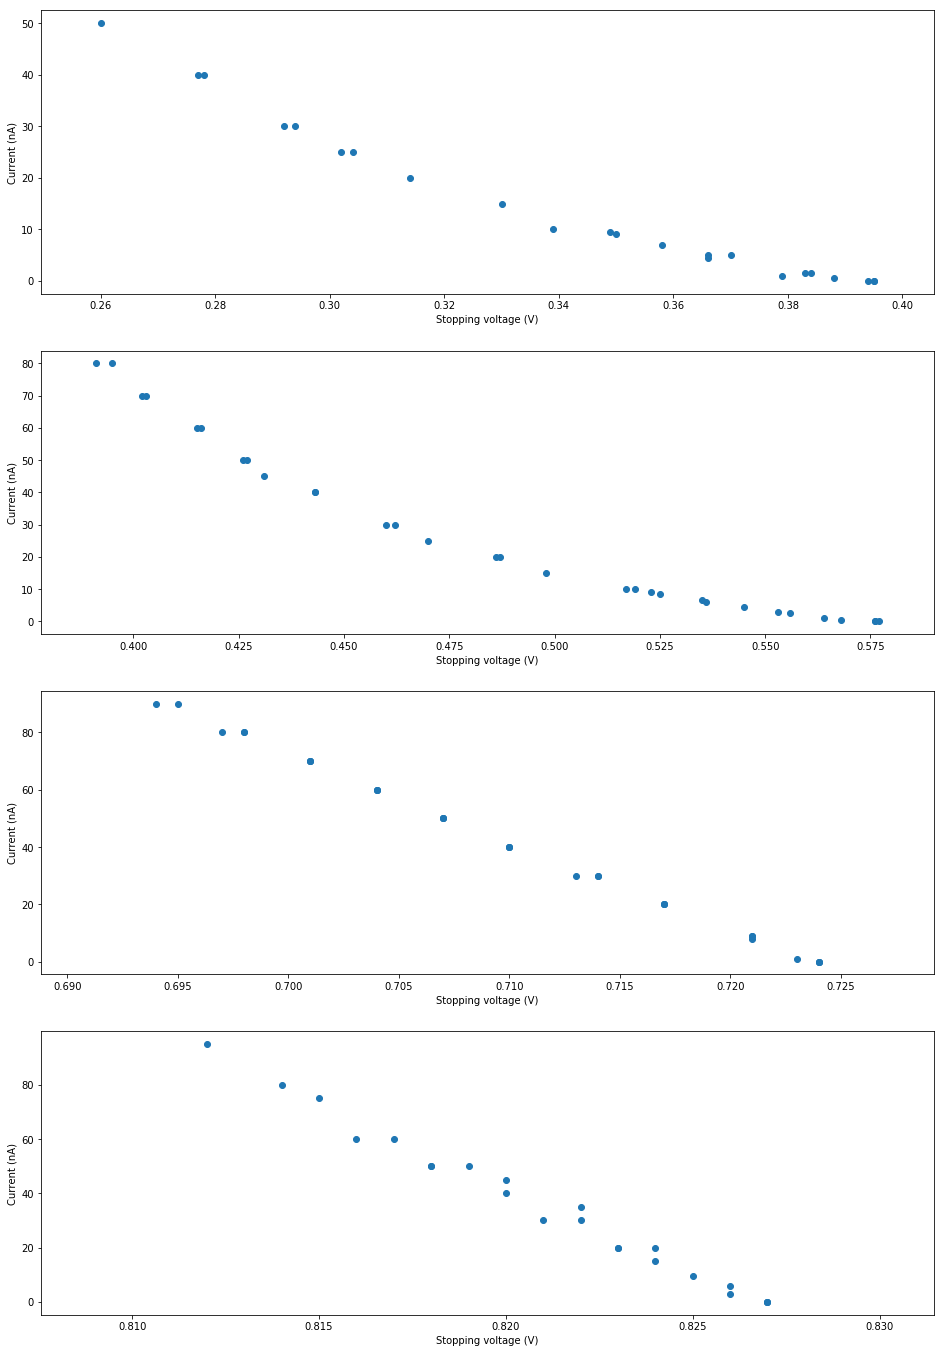

In [7]:
# plot I-V for each color
plt.figure(figsize=(16,24))

plt.subplot(4,1,1)
plt.scatter(Vred, Ired, label='659 nm')
plt.xlabel('Stopping voltage (V)')
plt.ylabel('Current (nA)')

plt.subplot(4,1,2)
plt.scatter(Vamb, Iamb, label='590 nm')
plt.xlabel('Stopping voltage (V)')
plt.ylabel('Current (nA)')

plt.subplot(4,1,3)
plt.scatter(Vgre, Igre, label='567 nm')
plt.xlabel('Stopping voltage (V)')
plt.ylabel('Current (nA)')

plt.subplot(4,1,4)
plt.scatter(Vblu, Iblu, label='469 nm')
plt.xlabel('Stopping voltage (V)')
plt.ylabel('Current (nA)')

plt.show()

In [8]:
# define current and voltage lists for different intensities of red light
v1 = []
v2 = []
v3 = []
i1 = []
i2 = []
i3 = []

In [9]:
# read csv files
with open('I1.csv') as data:
    csv_reader = csv.reader(data)
    
    for line in csv_reader:
        v1.append(float(line[0]))
        i1.append(float(line[1]))
        
with open('I2.csv') as data:
    csv_reader = csv.reader(data)
    
    for line in csv_reader:
        v2.append(float(line[0]))
        i2.append(float(line[1]))

with open('I3.csv') as data:
    csv_reader = csv.reader(data)
    
    for line in csv_reader:
        v3.append(float(line[0]))
        i3.append(float(line[1]))

In [10]:
# redefine voltage and current lists as Numpy arrays
v1 = np.array(v1)
v2 = np.array(v2)
v3 = np.array(v3)
i1 = np.array(i1)
i2 = np.array(i2)
i3 = np.array(i3)

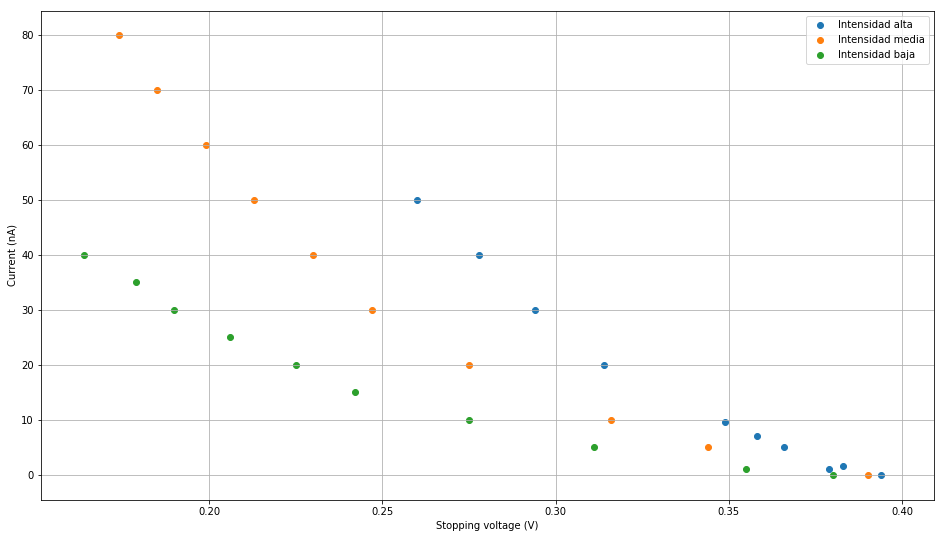

In [11]:
# plot I-V for each intensity
plt.figure(figsize=(16,9))

plt.scatter(v1,i1,label='Intensidad alta')
plt.scatter(v2,i2,label='Intensidad media')
plt.scatter(v3,i3,label='Intensidad baja')

plt.xlabel('Stopping voltage (V)')
plt.ylabel('Current (nA)')

plt.grid(True)
plt.legend()

plt.show()

In [12]:
# define an array with the average stopping voltage for each color
V0=np.array([np.mean([Vred[-1],Vred[-2],Vred[-3]]),np.mean([Vamb[-1],Vamb[-2],Vred[-3]]),
            np.mean([Vgre[-1],Vgre[-2],Vgre[-3]]),np.mean([Vblu[-1],Vblu[-2],Vblu[-3]])])

In [13]:
# define an array with the uncertainty of stopping voltage as the standard deviation
uncV=np.array([np.std([Vred[-1],Vred[-2],Vred[-3]]),np.std([Vamb[-1],Vamb[-2],Vred[-3]]),
            np.std([Vgre[-1],Vgre[-2],Vgre[-3]]),np.std([Vblu[-1],Vblu[-2],Vblu[-3]])])

In [14]:
# define an array with used wavelenghts in nm
wl=np.array([659,590,567,469])

In [15]:
# define an array with the frequencies corresponding to each wavelength
freq=(299792458)/(wl*(10**(-9)))

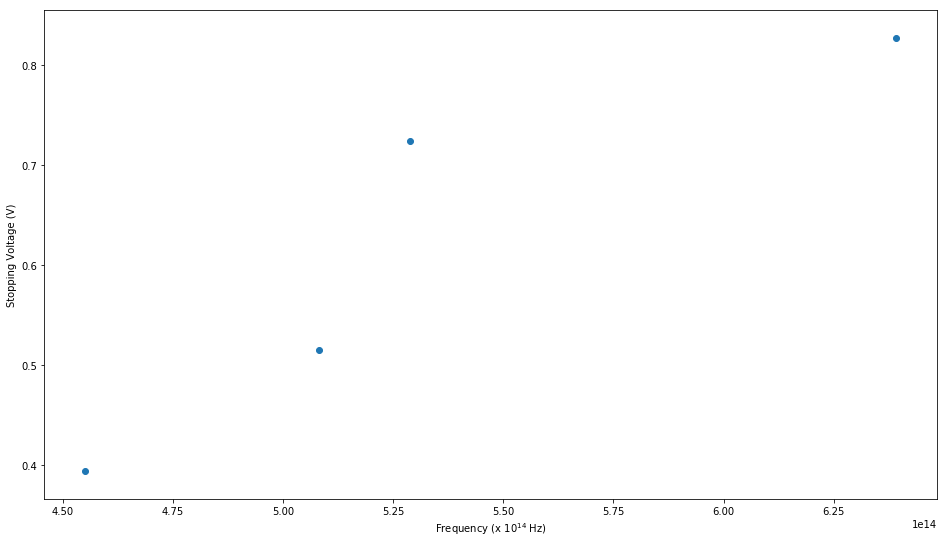

In [16]:
# plot stopping voltage as a function of frequency
plt.figure(figsize=(16,9))

plt.scatter(freq,V0)
plt.xlabel('Frequency (x $10^{14}$ Hz)')
plt.ylabel('Stopping Voltage (V)')

plt.show()

In [17]:
# define relative uncertainty of wavelength
wlrel=30/wl

In [18]:
# define absolute uncertainty of frequency
freqerr=wlrel*freq

In [19]:
# linear regression of frequency and stopping voltage
c = np.polyfit(freq,V0,1)
f = np.poly1d(c)

In [20]:
# define fundamental constants electron charge and Planck's constant
e=1.60217662*(10**(-19))
ht = 6.62607004*(10**(-34))

In [21]:
# calculate Planck's constant
h=c[0]*e

In [22]:
h

3.7110703818358016e-34

In [23]:
# compute experimental error for Planck's constant
(h-ht)/ht

-0.4399288930794638

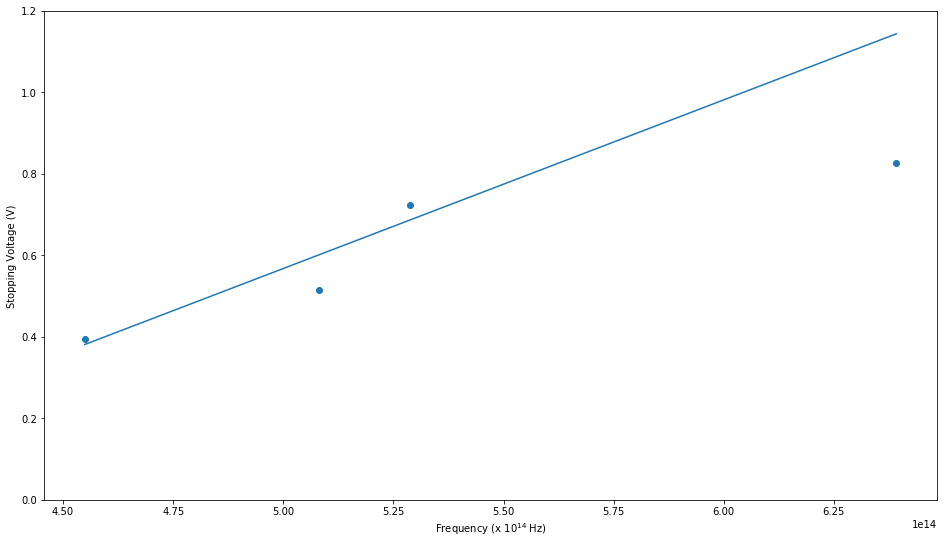

In [24]:
# plot stopping voltage as a function of frequency with linear fit
plt.figure(figsize=(16,9))

plt.scatter(freq,V0)
plt.plot(freq,ht/e*freq-1.5)
plt.xlabel('Frequency (x $10^{14}$ Hz)')
plt.ylabel('Stopping Voltage (V)')
plt.ylim(0,1.2)

plt.show()

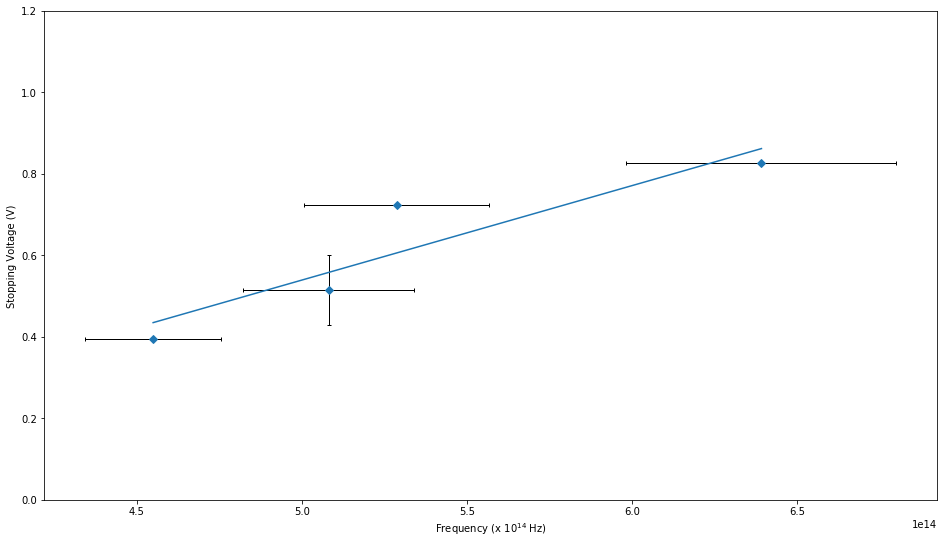

In [25]:
# plot stopping voltage as a function of frequency with linear fit and error bars
plt.figure(figsize=(16,9))

plt.errorbar(freq,V0,xerr=freqerr, yerr=uncV, ecolor='k', elinewidth=1, lw=0, marker='D', capsize=2)
plt.plot(freq,f(freq))
plt.xlabel('Frequency (x $10^{14}$ Hz)')
plt.ylabel('Stopping Voltage (V)')
plt.ylim(0,1.2)

plt.show()

In [26]:
# optimal plot width for \Latex doc
figw = 3.404

In [27]:
V0

array([0.39466667, 0.51566667, 0.724     , 0.827     ])

In [28]:
uncV

array([4.71404521e-04, 8.60322937e-02, 1.11022302e-16, 0.00000000e+00])

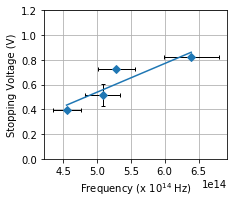

In [48]:
plt.figure(figsize=(figw,figw/1.1616))

plt.errorbar(freq,V0,xerr=freqerr, yerr=uncV, ecolor='k', elinewidth=1, lw=0, marker='D', capsize=2)
plt.plot(freq,f(freq))
plt.xlabel('Frequency (x $10^{14}$ Hz)')
plt.ylabel('Stopping Voltage (V)')
plt.ylim(0,1.2)
plt.grid(True)

plt.tight_layout()

plt.savefig('vf.pdf')

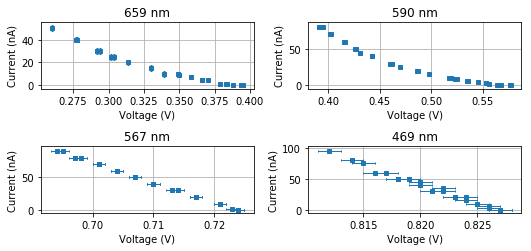

In [71]:
plt.figure(figsize=(figw*2.2,3.6))

plt.subplot(2,2,1)
plt.errorbar(Vred, Ired, xerr=0.001, yerr=rederr, ms=3.5, marker='s', lw=0, capsize=1, elinewidth=1, label='659 nm')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (nA)')
plt.title('659 nm')
plt.grid(True)

plt.subplot(2,2,2)
plt.errorbar(Vamb, Iamb, xerr=0.001, yerr=amberr, ms=3.5, marker='s', lw=0, capsize=1, elinewidth=1, label='590 nm')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (nA)')
plt.title('590 nm')
plt.grid(True)

plt.subplot(2,2,3)
plt.errorbar(Vgre, Igre,xerr=0.001, yerr=greerr, ms=3.5, marker='s', lw=0, capsize=1, elinewidth=1, label='567 nm')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (nA)')
plt.title('567 nm')
plt.grid(True)

plt.subplot(2,2,4)
plt.errorbar(Vblu, Iblu, xerr=0.001, yerr=bluerr, ms=3.5, marker='s', lw=0, capsize=1, elinewidth=1, label='469 nm')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (nA)')
plt.title('469 nm')
plt.grid(True)

plt.tight_layout()

plt.savefig('iv.pdf')

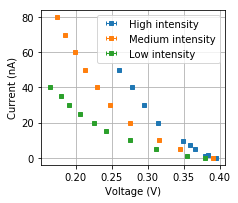

In [76]:
plt.figure(figsize=(figw,figw/1.1616))

plt.errorbar(v1,i1,xerr=0.001, lw=0, elinewidth=1, capsize=2, marker='s', ms=4, label='High intensity')
plt.errorbar(v2,i2,xerr=0.001, lw=0, elinewidth=1, capsize=2, marker='s', ms=4, label='Medium intensity')
plt.errorbar(v3,i3,xerr=0.001, lw=0, elinewidth=1, capsize=2, marker='s', ms=4, label='Low intensity')

plt.xlabel('Voltage (V)')
plt.ylabel('Current (nA)')

plt.grid(True)
plt.legend()

plt.tight_layout()

plt.savefig('i.pdf')

In [49]:
c[0]

2.3162679666588826e-15

### Uncertainty in slope

In [50]:
sqsum = sum((V0-c[1]-c[0]*freq)**2)

In [51]:
Delta = 4*sum(freq**2)-(sum(freq))**2

In [52]:
sigma = np.sqrt(1/2*sqsum)

In [53]:
unc_m = sigma*np.sqrt(4/Delta)

In [54]:
unc_m

7.18208862483665e-16

In [77]:
v1[-1]

0.394

In [78]:
v2[-1]

0.39

In [79]:
v3[-1]

0.38

In [80]:
unc_m/c[0]

0.3100715775643396